scraping data from Skytrax

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    
    print(f'Scraping page {i}')
    
    url = f'{base_url}/page/{i}/?sortby=post_date%3Adesc&pagesize={page_size}'
    
    response = requests.get(url)
    
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all('div', {'class': 'text_content'}):
        reviews.append(para.get_text())
    
    print(f'   ---> {len(reviews)} total reviews')

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df['reviews'] = reviews
df.head()

,reviews
0,✅ Trip Verified | I flew from Istanbul to Lo...
1,Not Verified | I have flow on BA several time...
2,✅ Trip Verified | The flight departed over a...
3,✅ Trip Verified | I hate British Airways! We...
4,✅ Trip Verified | Our BA flight from Porto t...


In [5]:
df.to_csv(r'C:\Users\Administrator\Desktop\data\BA_reviews.csv')

data preparation

In [7]:
df

,reviews
0,✅ Trip Verified | I flew from Istanbul to Lo...
1,Not Verified | I have flow on BA several time...
2,✅ Trip Verified | The flight departed over a...
3,✅ Trip Verified | I hate British Airways! We...
4,✅ Trip Verified | Our BA flight from Porto t...
...,...
995,✅ Trip Verified | I had flown British Airways ...
996,Not Verified | Gatwick to Tenerife. This airc...
997,✅ Trip Verified | Booked a flight through Exp...
998,✅ Trip Verified | Johannesburg to London. I h...


In [8]:
df.reviews = df.reviews.str.split('|', expand=True)[1]

df

,reviews
0,I flew from Istanbul to London in Business ...
1,I have flow on BA several times since the ai...
2,The flight departed over an hour late due t...
3,I hate British Airways! We get to London on...
4,Our BA flight from Porto to London Heathrow...
...,...
995,I had flown British Airways from Leeds Bradfo...
996,Gatwick to Tenerife. This aircraft either ne...
997,Booked a flight through Expedia for June 210...
998,Johannesburg to London. I had a bulkhead sea...


cleaning the text

In [9]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)

df.head()

,reviews,Cleaned Reviews
0,I flew from Istanbul to London in Business ...,I flew from Istanbul to London in Business cl...
1,I have flow on BA several times since the ai...,I have flow on BA several times since the air...
2,The flight departed over an hour late due t...,The flight departed over an hour late due to ...
3,I hate British Airways! We get to London on...,I hate British Airways We get to London on Oc...
4,Our BA flight from Porto to London Heathrow...,Our BA flight from Porto to London Heathrow T...


tokenization, POS tagging, stopwords removal, obtaining stem words

In [10]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)

df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I flew from Istanbul to London in Business ...,I flew from Istanbul to London in Business cl...,"[(flew, v), (Istanbul, n), (London, n), (Busin..."
1,I have flow on BA several times since the ai...,I have flow on BA several times since the air...,"[(flow, v), (BA, n), (several, a), (times, n),..."
2,The flight departed over an hour late due t...,The flight departed over an hour late due to ...,"[(flight, n), (departed, v), (hour, n), (late,..."
3,I hate British Airways! We get to London on...,I hate British Airways We get to London on Oc...,"[(hate, v), (British, a), (Airways, n), (get, ..."
4,Our BA flight from Porto to London Heathrow...,Our BA flight from Porto to London Heathrow T...,"[(BA, n), (flight, n), (Porto, n), (London, n)..."


In [14]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = ' '
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + ' ' + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + ' ' + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)

df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I flew from Istanbul to London in Business ...,I flew from Istanbul to London in Business cl...,"[(flew, v), (Istanbul, n), (London, n), (Busin...",fly Istanbul London Business class half flig...
1,I have flow on BA several times since the ai...,I have flow on BA several times since the air...,"[(flow, v), (BA, n), (several, a), (times, n),...",flow BA several time since airline start non...
2,The flight departed over an hour late due t...,The flight departed over an hour late due to ...,"[(flight, n), (departed, v), (hour, n), (late,...",flight depart hour late due late inbound pla...
3,I hate British Airways! We get to London on...,I hate British Airways We get to London on Oc...,"[(hate, v), (British, a), (Airways, n), (get, ...",hate British Airways get London Oct next fli...
4,Our BA flight from Porto to London Heathrow...,Our BA flight from Porto to London Heathrow T...,"[(BA, n), (flight, n), (Porto, n), (London, n)...",BA flight Porto London Heathrow operate Finn...


In [15]:
df[['reviews', 'Lemma']]

,reviews,Lemma
0,I flew from Istanbul to London in Business ...,fly Istanbul London Business class half flig...
1,I have flow on BA several times since the ai...,flow BA several time since airline start non...
2,The flight departed over an hour late due t...,flight depart hour late due late inbound pla...
3,I hate British Airways! We get to London on...,hate British Airways get London Oct next fli...
4,Our BA flight from Porto to London Heathrow...,BA flight Porto London Heathrow operate Finn...
...,...,...
995,I had flown British Airways from Leeds Bradfo...,fly British Airways Leeds Bradford London He...
996,Gatwick to Tenerife. This aircraft either ne...,Gatwick Tenerife aircraft either need refit ...
997,Booked a flight through Expedia for June 210...,Booked flight Expedia June Denver Paris via ...
998,Johannesburg to London. I had a bulkhead sea...,Johannesburg London bulkhead seat upper deck...


sentimental data analysis using VADER

In [16]:
!pip install vaderSentiment

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)

df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I flew from Istanbul to London in Business ...,I flew from Istanbul to London in Business cl...,"[(flew, v), (Istanbul, n), (London, n), (Busin...",fly Istanbul London Business class half flig...,-0.6240,Negative
1,I have flow on BA several times since the ai...,I have flow on BA several times since the air...,"[(flow, v), (BA, n), (several, a), (times, n),...",flow BA several time since airline start non...,0.8663,Positive
2,The flight departed over an hour late due t...,The flight departed over an hour late due to ...,"[(flight, n), (departed, v), (hour, n), (late,...",flight depart hour late due late inbound pla...,-0.7430,Negative
3,I hate British Airways! We get to London on...,I hate British Airways We get to London on Oc...,"[(hate, v), (British, a), (Airways, n), (get, ...",hate British Airways get London Oct next fli...,-0.7043,Negative
4,Our BA flight from Porto to London Heathrow...,Our BA flight from Porto to London Heathrow T...,"[(BA, n), (flight, n), (Porto, n), (London, n)...",BA flight Porto London Heathrow operate Finn...,0.8404,Positive


In [20]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    482
Negative    416
Neutral     102
Name: Analysis, dtype: int64

visualization

([<matplotlib.patches.Wedge at 0x13a497765d0>,
 [Text(0.06217041096298438, 1.0982417038160106, 'Positive'),
  Text(-0.40493702327429076, -1.022754128411006, 'Negative'),
  Text(1.2812797982849342, -0.42523179385708965, 'Neutral')],
 [Text(0.03391113325253693, 0.5990409293541875, '48.2%'),
  Text(-0.22087473996779494, -0.557865888224185, '41.6%'),
  Text(0.8067317248460697, -0.2677385368729823, '10.2%')])

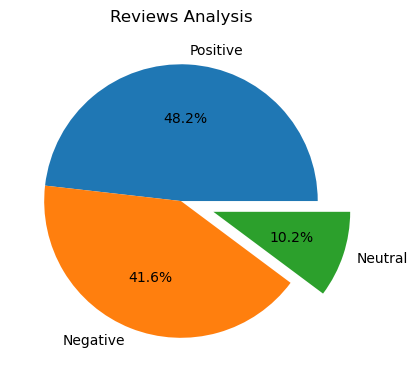

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

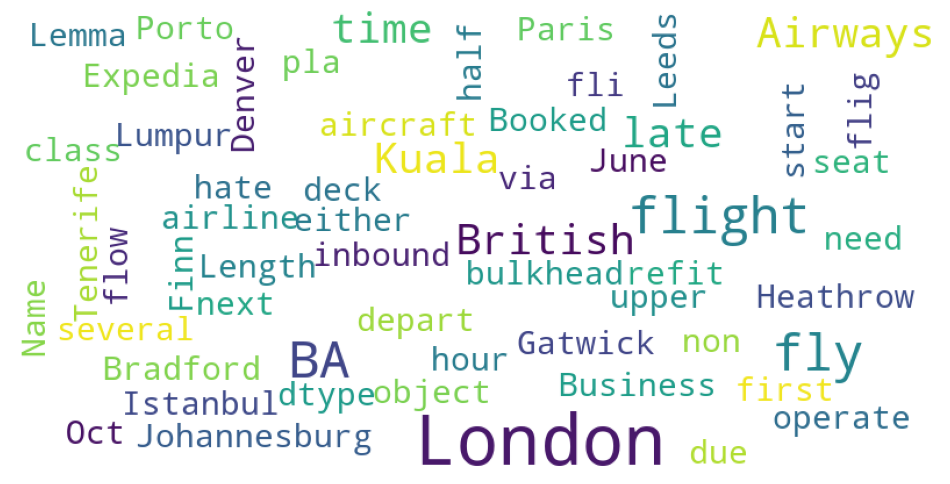

In [27]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=2,
        random_state=1)
    
    wordcloud = wordcloud.generate(str(data))
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df.Lemma)

In [29]:
df.to_csv(r'C:\Users\Administrator\Desktop\data\BA_reviews.csv')